In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

<IPython.core.display.Javascript object>


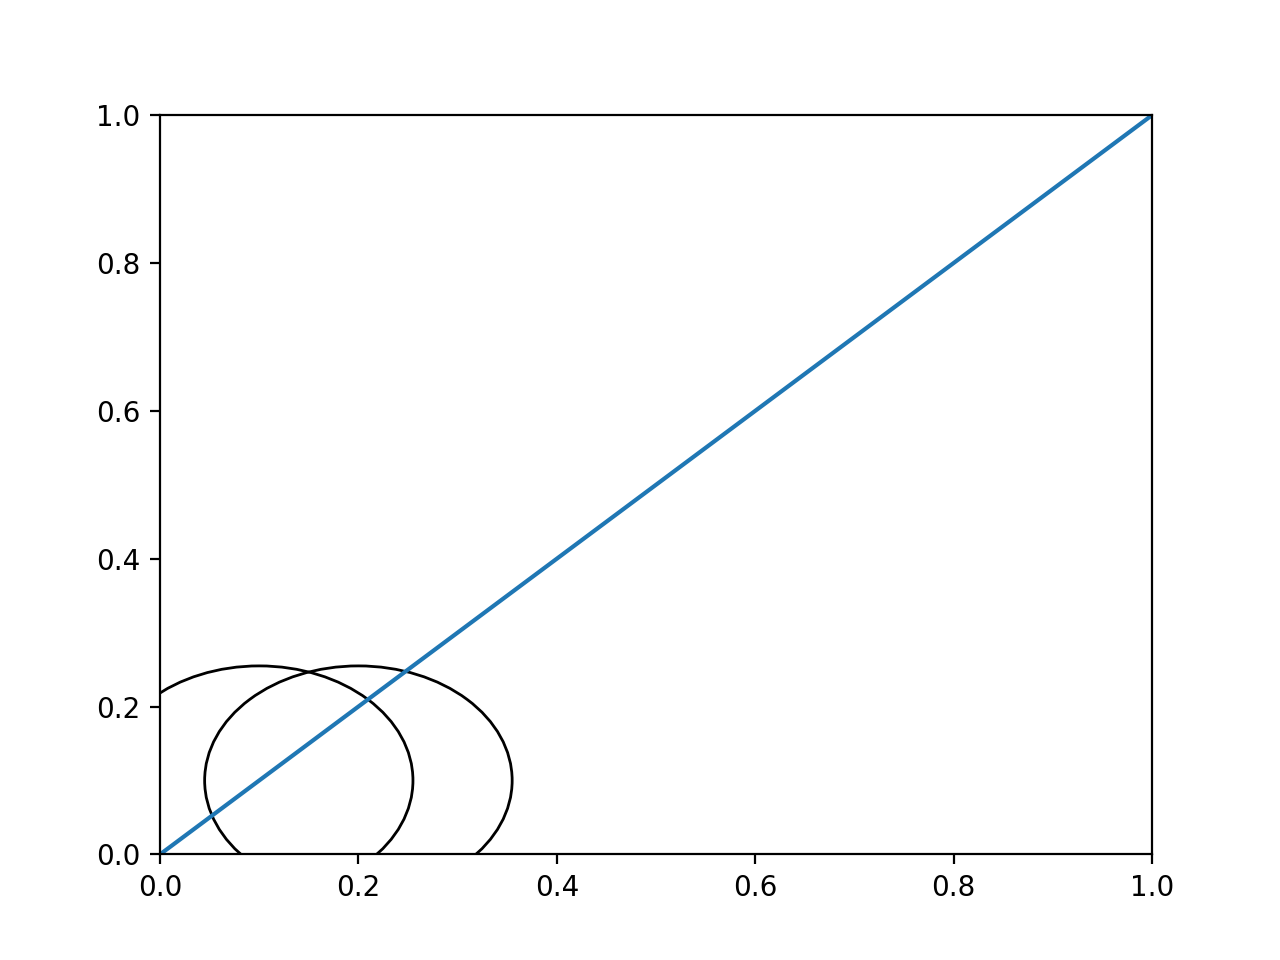

In [19]:

fig, ax = plt.subplots()
# note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

#circle1=plt.Circle((0.1,0.1),0.01)
#ax.add_artist(circle1)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.plot(np.arange(10),np.arange(10))

#x = np.linspace(0, 2 * np.pi, 120)
#y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(200):
    
    x=plt.Circle((0.1,0.1),0.001*i,fill=False) 
    y=plt.Circle((0.2,0.1),0.001*i,fill=False)  
    #ax.add_artist(x)
    #ax.add_artist(y)
    #ax.add_artist(x)
    im=ax.add_artist(x)
    im2=ax.add_artist(y)
    ims.append([im,im2])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

#plt.show()